In [1]:
#Importing required libraries
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm

In [2]:
#Importing the given Data Set
data = pd.read_csv('eCell_Retainability_data.csv')

In [3]:
data.head()

,eCell_Id,ErabRelAbnormalEnb_Param1,ErabRelAbnormalEnb_Param2,ErabRelAbnormalMme_Param1,ErabRelAbnormalMme_Param2,ErabRelMme_Param1,ErabRelMme_Param2,ErabRelNormalEnb_Param1,ErabRelNormalEnb_Param2,Retainability
0,NR_eCell_1,71,0.0,166,0.0,1065.0,0.0,135236.0,0.0,99.83
1,NR_eCell_2,23,0.0,43,0.0,364.0,0.0,107302.0,0.0,99.94
2,NR_eCell_3,66,0.0,64,0.0,980.0,0.0,175526.0,0.0,99.93
3,NR_eCell_4,303,2.0,334,3.0,2892.0,14.0,260291.0,2289.0,99.76
4,NR_eCell_5,91,2.0,102,2.0,1209.0,27.0,200431.0,1029.0,99.91


In [4]:
# Checking the datatype of columns in the given Data Set
data.dtypes

eCell_Id                      object
ErabRelAbnormalEnb_Param1      int64
ErabRelAbnormalEnb_Param2    float64
ErabRelAbnormalMme_Param1      int64
ErabRelAbnormalMme_Param2    float64
ErabRelMme_Param1            float64
ErabRelMme_Param2            float64
ErabRelNormalEnb_Param1      float64
ErabRelNormalEnb_Param2      float64
Retainability                float64
dtype: object

In [5]:
#Checking the information of the given Data Set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   eCell_Id                   10000 non-null  object 
 1   ErabRelAbnormalEnb_Param1  10000 non-null  int64  
 2   ErabRelAbnormalEnb_Param2  9988 non-null   float64
 3   ErabRelAbnormalMme_Param1  10000 non-null  int64  
 4   ErabRelAbnormalMme_Param2  9988 non-null   float64
 5   ErabRelMme_Param1          9988 non-null   float64
 6   ErabRelMme_Param2          9988 non-null   float64
 7   ErabRelNormalEnb_Param1    9988 non-null   float64
 8   ErabRelNormalEnb_Param2    9988 non-null   float64
 9   Retainability              10000 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 781.4+ KB


In [6]:
data['ErabRelAbnormalEnb_Param2'].fillna(data['ErabRelAbnormalEnb_Param2'].mean(), inplace=True)
data['ErabRelAbnormalMme_Param2'].fillna(data['ErabRelAbnormalMme_Param2'].mean(), inplace=True)
data['ErabRelMme_Param1'].fillna(data['ErabRelMme_Param1'].mean(), inplace=True)
data['ErabRelMme_Param2'].fillna(data['ErabRelMme_Param2'].mean(), inplace=True)
data['ErabRelNormalEnb_Param1'].fillna(data['ErabRelNormalEnb_Param1'].mean(), inplace=True)
data['ErabRelNormalEnb_Param2'].fillna(data['ErabRelNormalEnb_Param2'].mean(), inplace=True)

In [7]:
#Checking for Nulls/NaNs.
data.isnull().sum()

eCell_Id                     0
ErabRelAbnormalEnb_Param1    0
ErabRelAbnormalEnb_Param2    0
ErabRelAbnormalMme_Param1    0
ErabRelAbnormalMme_Param2    0
ErabRelMme_Param1            0
ErabRelMme_Param2            0
ErabRelNormalEnb_Param1      0
ErabRelNormalEnb_Param2      0
Retainability                0
dtype: int64

In [8]:
#Checking the shape i.e. count of rows and columns in the given Data Set
data.shape

(10000, 10)

In [9]:
#Checking the size i.e. count of observations in the given Data Set
data.size

100000

In [10]:
#Describing the variables in the data set in terms of statistical metrics
data.describe()

,ErabRelAbnormalEnb_Param1,ErabRelAbnormalEnb_Param2,ErabRelAbnormalMme_Param1,ErabRelAbnormalMme_Param2,ErabRelMme_Param1,ErabRelMme_Param2,ErabRelNormalEnb_Param1,ErabRelNormalEnb_Param2,Retainability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,70.273600,1.259111,63.576600,0.648678,660.229175,3.119543,72125.194033,154.986384,99.708659
std,150.064458,19.885032,136.768639,5.939188,1034.583528,20.994347,86279.778632,797.424209,0.589034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,80.000000
25%,8.000000,0.000000,9.000000,0.000000,117.000000,0.000000,12816.000000,0.000000,99.710000
50%,25.000000,0.000000,25.000000,0.000000,301.000000,0.000000,35366.000000,0.000000,99.860000
75%,74.000000,0.000000,67.000000,0.000000,779.000000,0.000000,102581.250000,0.000000,99.930000
max,4653.000000,1202.000000,5865.000000,318.000000,20822.000000,963.000000,702292.000000,43222.000000,100.000000


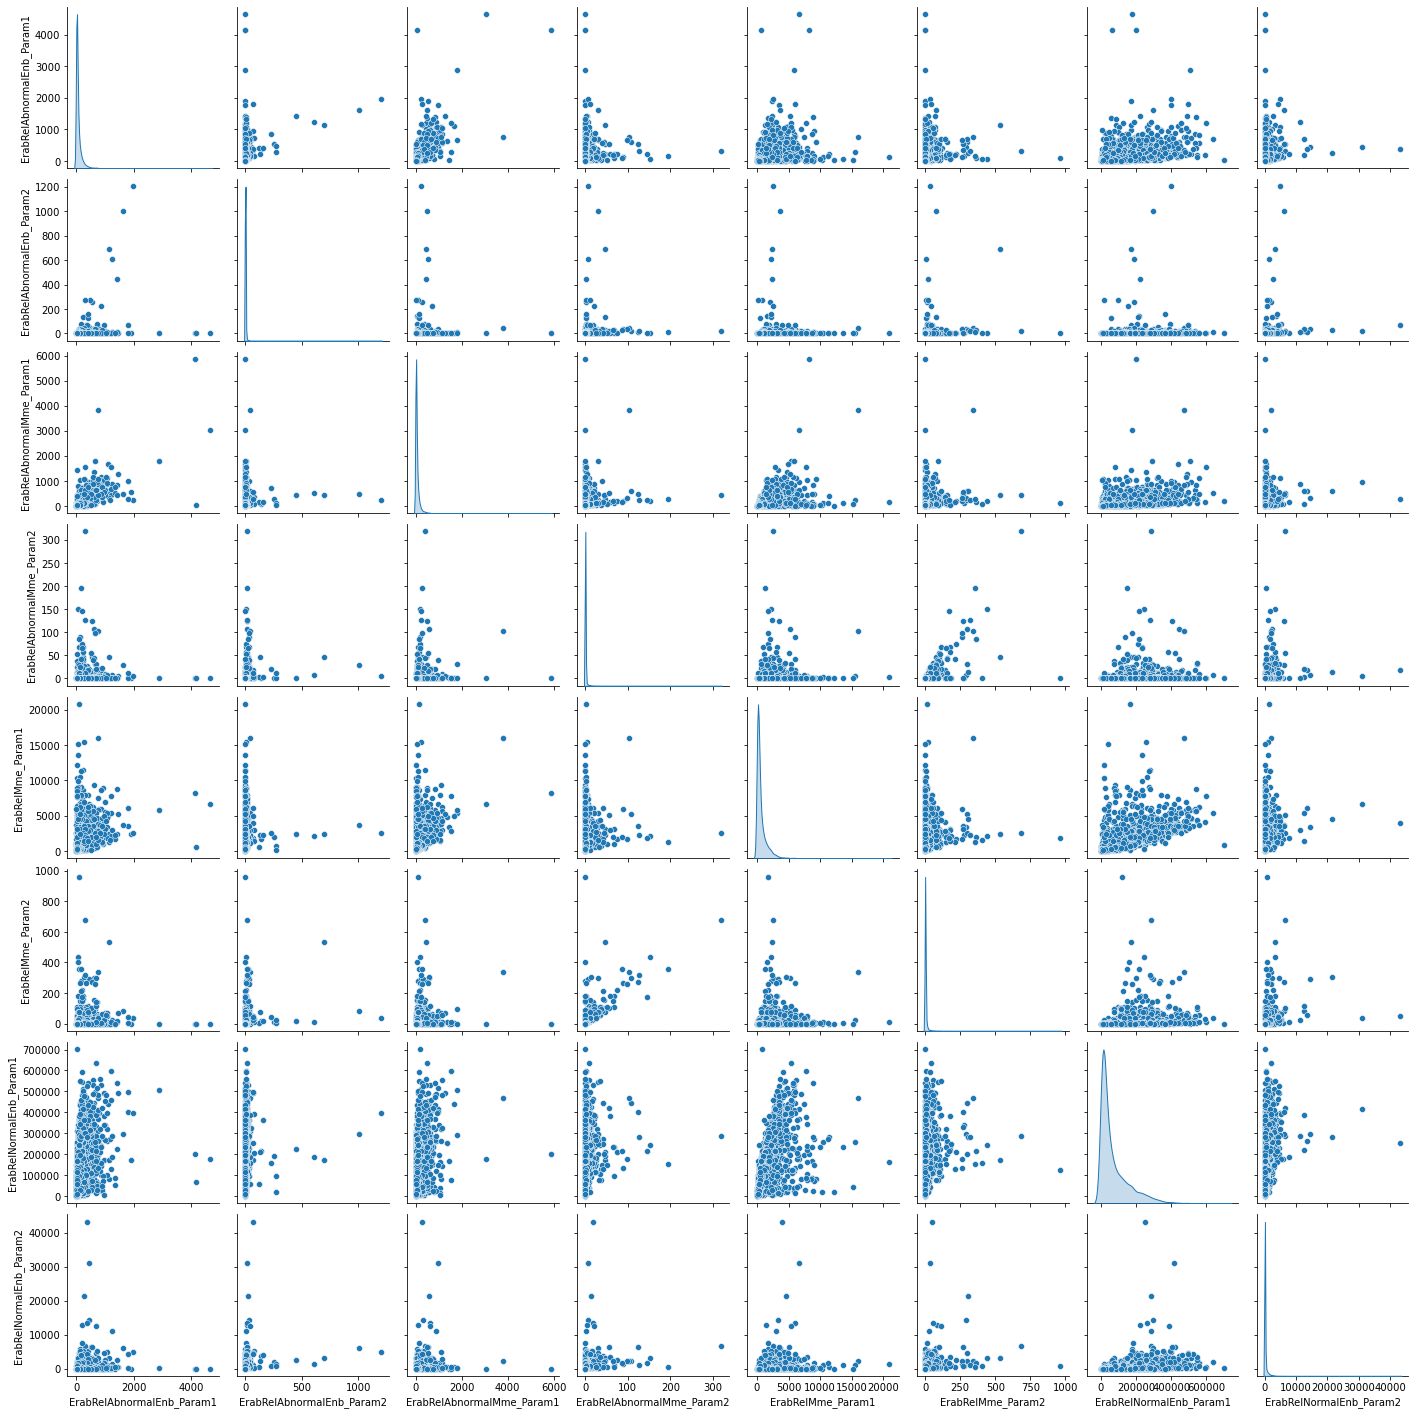

In [11]:
# Joint distribution plot of the independent variables
sns.pairplot(data[['ErabRelAbnormalEnb_Param1','ErabRelAbnormalEnb_Param2','ErabRelAbnormalMme_Param1','ErabRelAbnormalMme_Param2','ErabRelMme_Param1','ErabRelMme_Param2','ErabRelNormalEnb_Param1','ErabRelNormalEnb_Param2']], diag_kind="kde")

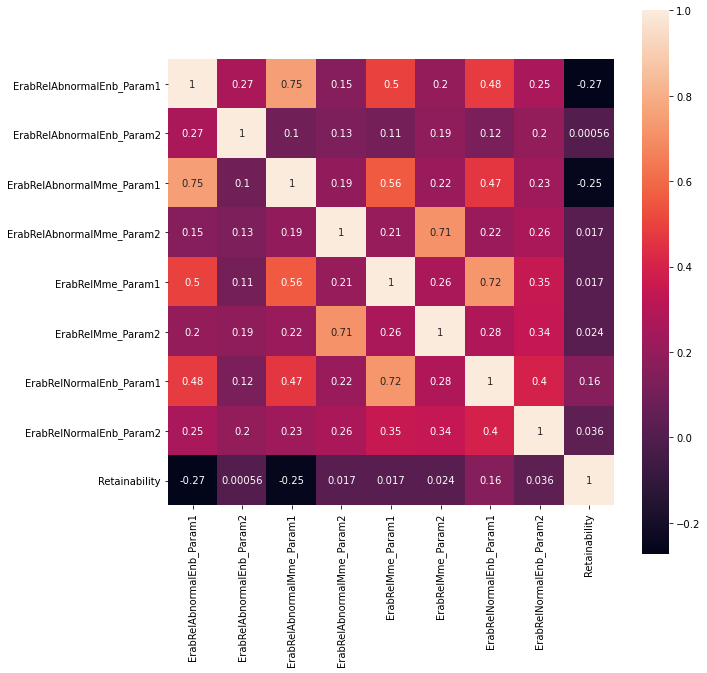

In [12]:
#Checking the correlation of given feature variables
corr = data.select_dtypes(include = ['float64','int64']).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True, annot = True)
plt.show()

In [13]:
# ErabRelAbnormalEnb Failure rate
ErabRelAbnormalEnb_rate= data[['eCell_Id','ErabRelAbnormalEnb_Param1','ErabRelAbnormalEnb_Param2']]
ErabRelAbnormalEnb_rate['ErabRelAbnormalEnb Failure Rate']= ErabRelAbnormalEnb_rate['ErabRelAbnormalEnb_Param2']/ErabRelAbnormalEnb_rate['ErabRelAbnormalEnb_Param1']*100
ErabRelAbnormalEnb_df = ErabRelAbnormalEnb_rate[['eCell_Id','ErabRelAbnormalEnb Failure Rate']]
ax = ErabRelAbnormalEnb_df.set_index('eCell_Id').head(10)
ax

C:\Users\renuk\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ErabRelAbnormalEnb Failure Rate
eCell_Id,
NR_eCell_1,0.000000
NR_eCell_2,0.000000
NR_eCell_3,0.000000
NR_eCell_4,0.660066
NR_eCell_5,2.197802
NR_eCell_6,1.398601
NR_eCell_7,0.000000
NR_eCell_8,0.000000
NR_eCell_9,0.000000


<AxesSubplot:xlabel='eCell_Id'>

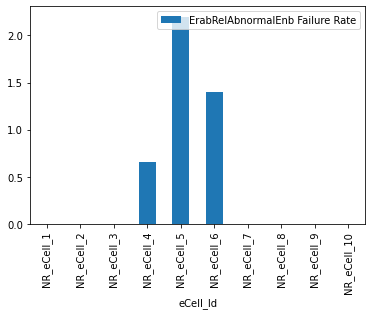

In [14]:
ax.plot(kind='bar')

In [15]:
# ErabRelAbnormalMme Failure rate
ErabRelAbnormalMme_rate= data[['eCell_Id','ErabRelAbnormalMme_Param1','ErabRelAbnormalMme_Param2']]
ErabRelAbnormalMme_rate['ErabRelAbnormalMme Failure Rate']= ErabRelAbnormalMme_rate['ErabRelAbnormalMme_Param2']/ErabRelAbnormalMme_rate['ErabRelAbnormalMme_Param1']*100
ErabRelAbnormalMme_df = ErabRelAbnormalMme_rate[['eCell_Id','ErabRelAbnormalMme Failure Rate']]
ax = ErabRelAbnormalMme_df.set_index('eCell_Id').head(10)
ax

C:\Users\renuk\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ErabRelAbnormalMme Failure Rate
eCell_Id,
NR_eCell_1,0.000000
NR_eCell_2,0.000000
NR_eCell_3,0.000000
NR_eCell_4,0.898204
NR_eCell_5,1.960784
NR_eCell_6,2.631579
NR_eCell_7,0.000000
NR_eCell_8,0.000000
NR_eCell_9,0.000000


<AxesSubplot:xlabel='eCell_Id'>

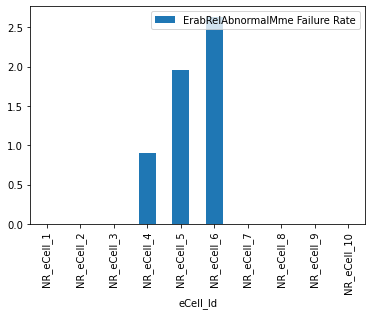

In [16]:
ax.plot(kind='bar')

In [17]:
# ErabRelNormalEnb Failure rate
ErabRelNormalEnb_rate= data[['eCell_Id','ErabRelNormalEnb_Param1','ErabRelNormalEnb_Param2']]
ErabRelNormalEnb_rate['ErabRelNormalEnb Failure Rate']= ErabRelNormalEnb_rate['ErabRelNormalEnb_Param2']/ErabRelNormalEnb_rate['ErabRelNormalEnb_Param1']*100
ErabRelNormalEnb_df = ErabRelNormalEnb_rate[['eCell_Id','ErabRelNormalEnb Failure Rate']]
ax = ErabRelNormalEnb_df.set_index('eCell_Id').head(10)
ax

C:\Users\renuk\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ErabRelNormalEnb Failure Rate
eCell_Id,
NR_eCell_1,0.000000
NR_eCell_2,0.000000
NR_eCell_3,0.000000
NR_eCell_4,0.879400
NR_eCell_5,0.513394
NR_eCell_6,0.878632
NR_eCell_7,0.000000
NR_eCell_8,0.000000
NR_eCell_9,0.000000


<AxesSubplot:xlabel='eCell_Id'>

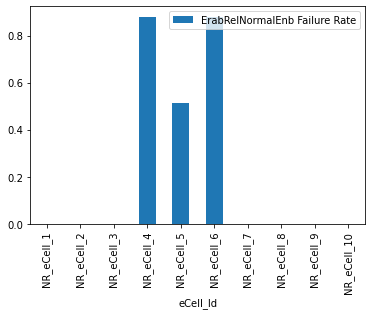

In [18]:
ax.plot(kind='bar')

In [19]:
#seperating independent and dependent variables
x = data.drop(['Retainability','eCell_Id'], axis=1)
y = data['Retainability']
x.shape, y.shape

((10000, 8), (10000,))

In [20]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 56,test_size=0.3)

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

### Linear Regression 

In [22]:
from numpy import sqrt
lin_reg = LinearRegression() 
lin_reg.fit(x_train_std,y_train) 
#Prediction using test set
y_pred = lin_reg.predict(x_test_std) 
mae=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
# Printing the metrics 
print('R2 square:',metrics.r2_score(y_test, y_pred)) 
print('MAE: ', mae) 
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.24619186896295686
MAE:  0.2176790529940135
MSE:  0.22189096935867375
RMSE:  0.4710530430415175


In [23]:
x_test= pd.DataFrame(x_test)
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Retainability']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,ErabRelAbnormalEnb_Param1,ErabRelAbnormalEnb_Param2,ErabRelAbnormalMme_Param1,ErabRelAbnormalMme_Param2,ErabRelMme_Param1,ErabRelMme_Param2,ErabRelNormalEnb_Param1,ErabRelNormalEnb_Param2,Retainability,Pred_Retainability
0,35,0.0,6,0.0,105.0,0.0,15220.0,0.0,99.73,99.652802
1,15,0.0,10,0.0,248.0,0.0,57480.0,0.0,99.96,99.813615
2,8,0.0,16,0.0,226.0,0.0,37162.0,0.0,99.94,99.745725
3,10,0.0,8,0.0,108.0,0.0,10969.0,0.0,99.84,99.665914
4,99,0.0,91,0.0,1521.0,0.0,179531.0,91.0,99.90,100.009714


### Decision Tree Regression

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = {'max_features': ['auto', 'sqrt'],
              'max_depth': np.arange(5, 36, 5),
              'min_samples_split': [5, 10, 20, 40],
              'min_samples_leaf': [2, 6, 12, 24],
             }
tree_reg = RandomizedSearchCV(estimator = DecisionTreeRegressor(),param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
tree_reg.fit(x_train_std, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 6, 12, 24],
                                        'min_samples_split': [5, 10, 20, 40]},
                   verbose=2)

In [25]:
y_pred = tree_reg.predict(x_test_std) 
mae=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print('R2 square:',metrics.r2_score(y_test, y_pred)) 
print('MAE: ', mae) 
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.5337721872795871
MAE:  0.07204305555555583
MSE:  0.13723882384259248
RMSE:  0.37045758710356097


In [26]:
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Retainability']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,ErabRelAbnormalEnb_Param1,ErabRelAbnormalEnb_Param2,ErabRelAbnormalMme_Param1,ErabRelAbnormalMme_Param2,ErabRelMme_Param1,ErabRelMme_Param2,ErabRelNormalEnb_Param1,ErabRelNormalEnb_Param2,Retainability,Pred_Retainability
0,35,0.0,6,0.0,105.0,0.0,15220.0,0.0,99.73,99.743333
1,15,0.0,10,0.0,248.0,0.0,57480.0,0.0,99.96,99.960000
2,8,0.0,16,0.0,226.0,0.0,37162.0,0.0,99.94,99.930000
3,10,0.0,8,0.0,108.0,0.0,10969.0,0.0,99.84,99.832500
4,99,0.0,91,0.0,1521.0,0.0,179531.0,91.0,99.90,99.896667


### Gradient Boost Regression

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {"learning_rate"    : [0.01, 0.1, 0.3],
              "subsample"        : [0.5, 1.0],
              "max_depth"        : [3, 4, 5, 10, 15, 20],
              "max_features"     : ['auto', 'sqrt'],
              "min_samples_split": [5, 10, 20, 40],
              "min_samples_leaf" : [2, 6, 12, 24]
             }
grad_reg = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
grad_reg.fit(x_train_std, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 4, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 6, 12, 24],
                                        'min_samples_split': [5, 10, 20, 40],
                                        'subsample': [0.5, 1.0]},
                   verbose=2)

In [28]:
y_pred = grad_reg.predict(x_test_std)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse= sqrt(mse)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.8509136864931242
MAE:  0.055244843009648
MSE:  0.043885048807633734
RMSE:  0.20948758628528263


In [29]:
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Retainability']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,ErabRelAbnormalEnb_Param1,ErabRelAbnormalEnb_Param2,ErabRelAbnormalMme_Param1,ErabRelAbnormalMme_Param2,ErabRelMme_Param1,ErabRelMme_Param2,ErabRelNormalEnb_Param1,ErabRelNormalEnb_Param2,Retainability,Pred_Retainability
0,35,0.0,6,0.0,105.0,0.0,15220.0,0.0,99.73,99.733032
1,15,0.0,10,0.0,248.0,0.0,57480.0,0.0,99.96,99.947165
2,8,0.0,16,0.0,226.0,0.0,37162.0,0.0,99.94,99.918401
3,10,0.0,8,0.0,108.0,0.0,10969.0,0.0,99.84,99.848053
4,99,0.0,91,0.0,1521.0,0.0,179531.0,91.0,99.90,99.888026


### Adaboost Regression

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
param_grid = {"learning_rate" : [0.01, 0.1, 0.3],
              "loss"          : ['linear', 'square', 'exponential']
             }
ada_reg = RandomizedSearchCV(AdaBoostRegressor( DecisionTreeRegressor(), n_estimators=100), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
ada_reg.fit(x_train_std, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\renuk\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                               n_estimators=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'loss': ['linear', 'square',
                                                 'exponential']},
                   verbose=2)

In [31]:
y_pred = ada_reg.predict(x_test_std)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse= sqrt(mse)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.7820576922339065
MAE:  0.050603333333333445
MSE:  0.06415349999999992
RMSE:  0.2532854121342165


In [32]:
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Retainability']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,ErabRelAbnormalEnb_Param1,ErabRelAbnormalEnb_Param2,ErabRelAbnormalMme_Param1,ErabRelAbnormalMme_Param2,ErabRelMme_Param1,ErabRelMme_Param2,ErabRelNormalEnb_Param1,ErabRelNormalEnb_Param2,Retainability,Pred_Retainability
0,35,0.0,6,0.0,105.0,0.0,15220.0,0.0,99.73,99.76
1,15,0.0,10,0.0,248.0,0.0,57480.0,0.0,99.96,99.96
2,8,0.0,16,0.0,226.0,0.0,37162.0,0.0,99.94,99.93
3,10,0.0,8,0.0,108.0,0.0,10969.0,0.0,99.84,99.84
4,99,0.0,91,0.0,1521.0,0.0,179531.0,91.0,99.90,99.89


### Support Vector Regression

In [33]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(x_train_std,y_train)
y_pred_svm=regressor.predict(x_test_std)
#y_pred_svm = cross_val_predict(regressor, x, y)
mae=metrics.mean_absolute_error(y_test, y_pred_svm)
mse=metrics.mean_squared_error(y_test, y_pred_svm)
rmse = sqrt(mse)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.5210610261196889
MAE:  0.10952998961812371
MSE:  0.14098048137494607
RMSE:  0.3754736760079807


In [34]:
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Retainability']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,ErabRelAbnormalEnb_Param1,ErabRelAbnormalEnb_Param2,ErabRelAbnormalMme_Param1,ErabRelAbnormalMme_Param2,ErabRelMme_Param1,ErabRelMme_Param2,ErabRelNormalEnb_Param1,ErabRelNormalEnb_Param2,Retainability,Pred_Retainability
0,35,0.0,6,0.0,105.0,0.0,15220.0,0.0,99.73,99.76
1,15,0.0,10,0.0,248.0,0.0,57480.0,0.0,99.96,99.96
2,8,0.0,16,0.0,226.0,0.0,37162.0,0.0,99.94,99.93
3,10,0.0,8,0.0,108.0,0.0,10969.0,0.0,99.84,99.84
4,99,0.0,91,0.0,1521.0,0.0,179531.0,91.0,99.90,99.89


### Regression Using Neurak Network

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredError

In [36]:
from tensorflow.keras import Sequential
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.02
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [37]:
# loss function
mse = MeanSquaredError()
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(
    loss=mse, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mse,rmse]
)
# train the model
history = model.fit(
    x_train_std, 
    y_train, 
    epochs=30, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/30
88/88 [==============================] - 1s 12ms/step - loss: 766.7380 - mean_squared_error: 762.5039 - root_mean_squared_error: 27.6900 - val_loss: 2.9581 - val_mean_squared_error: 2.9550 - val_root_mean_squared_error: 1.7199
Epoch 2/30
88/88 [==============================] - 1s 6ms/step - loss: 25.3271 - mean_squared_error: 25.3113 - root_mean_squared_error: 5.0326 - val_loss: 3.2180 - val_mean_squared_error: 3.2321 - val_root_mean_squared_error: 1.7939
Epoch 3/30
88/88 [==============================] - 1s 7ms/step - loss: 20.5959 - mean_squared_error: 20.5978 - root_mean_squared_error: 4.5383 - val_loss: 1.1119 - val_mean_squared_error: 1.1096 - val_root_mean_squared_error: 1.0545
Epoch 4/30
88/88 [==============================] - 1s 7ms/step - loss: 15.6649 - mean_squared_error: 15.6394 - root_mean_squared_error: 3.9579 - val_loss: 0.5197 - val_mean_squared_error: 0.5226 - val_root_mean_squared_error: 0.7209
Epoch 5/30
88/88 [==============================] - 1s 7ms/s

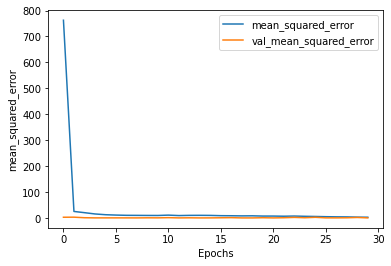

In [38]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_error')

In [39]:
y_pred= model.predict(x_test_std).tolist()
#pred=dt.predict(X_test).tolist()
#y_test=y_test.tolist()
for X,Y in zip(y_pred, y_test):
    print("Model:", X, "actual:", Y)

Model: [99.9668960571289] actual: 99.73
Model: [100.27945709228516] actual: 99.96
Model: [100.15902709960938] actual: 99.94
Model: [99.98267364501953] actual: 99.84
Model: [100.28347778320312] actual: 99.9
Model: [100.17668914794922] actual: 99.96
Model: [100.31426239013672] actual: 99.93
Model: [99.92816925048828] actual: 99.7
Model: [100.05290985107422] actual: 99.89
Model: [99.52339172363281] actual: 99.32
Model: [100.27530670166016] actual: 99.88
Model: [100.20386505126953] actual: 99.85
Model: [99.9709243774414] actual: 99.79
Model: [100.0168685913086] actual: 99.9
Model: [100.02998352050781] actual: 99.8
Model: [100.20428466796875] actual: 99.88
Model: [100.27584075927734] actual: 99.91
Model: [99.53894805908203] actual: 99.22
Model: [99.9880599975586] actual: 99.92
Model: [99.94475555419922] actual: 99.96
Model: [100.15999603271484] actual: 99.93
Model: [100.21556091308594] actual: 99.85
Model: [99.92943572998047] actual: 99.68
Model: [99.84891510009766] actual: 99.4
Model: [100

In [40]:
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Retainability']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,ErabRelAbnormalEnb_Param1,ErabRelAbnormalEnb_Param2,ErabRelAbnormalMme_Param1,ErabRelAbnormalMme_Param2,ErabRelMme_Param1,ErabRelMme_Param2,ErabRelNormalEnb_Param1,ErabRelNormalEnb_Param2,Retainability,Pred_Retainability
0,35,0.0,6,0.0,105.0,0.0,15220.0,0.0,99.73,99.966896
1,15,0.0,10,0.0,248.0,0.0,57480.0,0.0,99.96,100.279457
2,8,0.0,16,0.0,226.0,0.0,37162.0,0.0,99.94,100.159027
3,10,0.0,8,0.0,108.0,0.0,10969.0,0.0,99.84,99.982674
4,99,0.0,91,0.0,1521.0,0.0,179531.0,91.0,99.90,100.283478


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               1440      
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               77280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 480)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               123136    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 202,113
Trainable params: 202,113
Non-trainable params: 0
__________________________________________________

In [42]:
import tensorflow as tf
import keras
from keras import utils as np_utils
from tensorflow.keras import layers

In [43]:
input_size=8
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(x_train_std,y_train,epochs=10,verbose=1)

Epoch 1/10
219/219 [==============================] - 0s 2ms/step - loss: 575.1201
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 1.5659
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 1.2302
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 0.9884
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.8134
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 0.6867
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5950
Epoch 8/10
219/219 [==============================] - 1s 2ms/step - loss: 0.5287
Epoch 9/10
219/219 [==============================] - 1s 3ms/step - loss: 0.4806
Epoch 10/10
219/219 [==============================] - 1s 3ms/step - loss: 0.4456


In [44]:
models.layers[0].get_weights()

[array([[ 0.20079488],
        [ 0.15834084],
        [ 0.34070265],
        [-0.13110572],
        [ 0.1276427 ],
        [-0.03757881],
        [ 2.7029567 ],
        [-0.32045248]], dtype=float32),
 array([99.3936], dtype=float32)]

In [45]:
weights=models.layers[0].get_weights()[0]
bias=models.layers[0].get_weights()[1]

In [46]:
y_pred= model.predict(x_test_std)

In [47]:
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Retainability']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,ErabRelAbnormalEnb_Param1,ErabRelAbnormalEnb_Param2,ErabRelAbnormalMme_Param1,ErabRelAbnormalMme_Param2,ErabRelMme_Param1,ErabRelMme_Param2,ErabRelNormalEnb_Param1,ErabRelNormalEnb_Param2,Retainability,Pred_Retainability
0,35,0.0,6,0.0,105.0,0.0,15220.0,0.0,99.73,99.966896
1,15,0.0,10,0.0,248.0,0.0,57480.0,0.0,99.96,100.279457
2,8,0.0,16,0.0,226.0,0.0,37162.0,0.0,99.94,100.159027
3,10,0.0,8,0.0,108.0,0.0,10969.0,0.0,99.84,99.982674
4,99,0.0,91,0.0,1521.0,0.0,179531.0,91.0,99.90,100.283478


In [48]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred, squared=False)
mse

0.5397946989920408

In [49]:
rmse = sqrt(mse)
rmse

0.7347072199128308